In [1]:
import expectexception
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import warnings; warnings.filterwarnings(action='ignore')
%matplotlib inline

#for Netcdf manipulation
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#for array manipulation
import numpy as np
import pandas as pd
from scipy import signal

#for plotting
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as plt

#for interpolation
from scipy.spatial import cKDTree

import xarray as xr
import numpy as np
import cmocean # for perceptually uniform colormaps
import cartopy as cr # for geographic mapping
import cartopy.crs as ccrs # for map projections
import matplotlib.pyplot as plt # plotting tool
import cartopy.feature as cfeature # to add coastlines, land and ocean
from cartopy import config
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfea
import seaborn as sns
import netCDF4
import numpy
import xarray
from netCDF4 import Dataset
import datetime
import csv
from scipy import signal
import scipy.stats

In [2]:
##Saved path 
ifile = 'C:/Users/user/Research/Research Code/CNN/PDO/'
ifile_data ='C:/Users/user/Research/Research Code/CNN/Data/'
outdir = 'C:/Users/user/Research/Research Code/CNN/PDO/'
outdir_smooth_pred_MME = 'C:/Users/user/Research/Research Code/MME_CMIP6/PDO/smoothed/pred/'
outdir_original_valid = 'C:/Users/user/Research/Research Code/CIMP6/PDO/original/validation/'
outdir_smooth_pred_CWCNN = 'C:/Users/user/Research/Research Code/CNN/CW_PDO/smoothed/pred/'

In [3]:
def correlation(x,y,z):
    corr_test = np.corrcoef(x [0:i],y [0:i])[0,1]
    z.append(corr_test)
def adjust(ds):
    z1 = np.array(ds)
    df = pd.DataFrame (z1)
    pred = df.iloc[:,0]
    return pred 
def frame(ds):
    df_ds = pd.DataFrame(ds,a)
    y_ds = df_ds.groupby(pd.Grouper(freq='1Y')).mean()
    return y_ds
def mean(x):
    avg = sum(x)/len(x)
    return round(avg,2)
def lowpass_filter (x,y):
    '''fraction of nyquist frequency, here  it is 10 years'''
    fs=1/12/30/24/3600 

    nyquist = fs / 2 # 0.5 times the sampling frequency
    cutoff=x # fraction of nyquist frequency, here  it is 10 years
    b, a = signal.butter(5, cutoff, btype='lowpass') #low pass filter


    dUfilt = signal.filtfilt(b, a, y)
    dUfilt=np.array(dUfilt)
    dUfilt=dUfilt.transpose()
    return dUfilt

In [4]:
time = np.arange('1983-01', '2023-01', dtype='datetime64[M]')

In [5]:
##Import observation
PDO_ncei = pd.read_excel(ifile_data+'NCEI PDO index _overall.xlsx',header=None,index_col=None,
                      skiprows=985, skipfooter = 0,
                      usecols=[1]  
                     )

PDO_ncei = adjust(PDO_ncei)

In [6]:
lead_time=360
#Imported PDO index
PDO_CNN = np.loadtxt(outdir_smooth_pred_CWCNN+'Result_PDO index_pred_cwcnn_smoothed'+str(lead_time)+'.csv', dtype=float)
PDO_MME = np.loadtxt(outdir_smooth_pred_MME+'Result_PDO index_MME_smoothed'+'.csv', dtype=float)
PDO_MPI_ESM = np.loadtxt(outdir_smooth_pred_MME+'Result_PDO index_MPI-ESM1-2_smoothed.csv', dtype=float)
PDO_ACCESS_CM2 = np.loadtxt(outdir_smooth_pred_MME+'Result_PDO index_ACCESS-CM2_smoothed.csv', dtype=float)
PDO_CAMS_CSM1_0 = np.loadtxt(outdir_smooth_pred_MME+'Result_PDO index_CAMS-CSM1-0_smoothed.csv', dtype=float)
PDO_CanESM5 = np.loadtxt(outdir_smooth_pred_MME+'Result_PDO index_CanESM5_smoothed.csv', dtype=float)
PDO_CMCC_CM2_SR5 = np.loadtxt(outdir_smooth_pred_MME+'Result_PDO index_CMCC-CM2-SR5_smoothed.csv', dtype=float)
PDO_INM_CM4_8 = np.loadtxt(outdir_smooth_pred_MME+'Result_PDO index_INM-CM4-8_smoothed.csv', dtype=float)
PDO_MIROC6 = np.loadtxt(outdir_smooth_pred_MME+'Result_PDO index_MIROC6_smoothed.csv', dtype=float)

In [7]:
index = ['CNN','MME','MPI-ESM','ACCESS-CM2','CAMS-CSM1-0','CanESM5','CMCC-CM2-SR5','INM-CM4-8','MIROC6']

In [8]:
PDO_CAMS_CSM1_0.shape

(480,)

In [9]:
#Converted data 
phase_ncei=[]
phase_CNN=[]
phase_MME=[]
phase_MPI_ESM=[]
phase_ACCESS_CM2=[]
phase_CAMS_CSM1_0=[]
phase_CanESM5=[]
phase_CMCC_CM2_SR5=[]
phase_INM_CM4_8=[]
phase_MIROC6=[]

a= PDO_ncei
for i in range(0,480):
    if a[i]>0:
        phase_ncei.append("Positive")
    else:
        phase_ncei.append("Negative")
a= PDO_CNN
for i in range(0,480):
    if a[i]>0:
        phase_CNN.append("Positive")
    else:
        phase_CNN.append("Negative")
        
a= PDO_MME
for i in range(0,480):
    if a[i]>0:
        phase_MME.append("Positive")
    else:
        phase_MME.append("Negative")
        
a= PDO_MPI_ESM
for i in range(0,480):
    if a[i]>0:
        phase_MPI_ESM.append("Positive")
    else:
        phase_MPI_ESM.append("Negative")
        
a= PDO_ACCESS_CM2
for i in range(0,480):
    if a[i]>0:
        phase_ACCESS_CM2.append("Positive")
    else:
        phase_ACCESS_CM2.append("Negative")
        
a= PDO_CAMS_CSM1_0
for i in range(0,480):
    if a[i]>0:
        phase_CAMS_CSM1_0.append("Positive")
    else:
        phase_CAMS_CSM1_0.append("Negative")
        
a= PDO_CanESM5
for i in range(0,480):
    if a[i]>0:
        phase_CanESM5.append("Positive")
    else:
        phase_CanESM5.append("Negative")
        
a= PDO_CMCC_CM2_SR5
for i in range(0,480):
    if a[i]>0:
        phase_CMCC_CM2_SR5.append("Positive")
    else:
        phase_CMCC_CM2_SR5.append("Negative")
        
a= PDO_INM_CM4_8
for i in range(0,480):
    if a[i]>0:
        phase_INM_CM4_8.append("Positive")
    else:
        phase_INM_CM4_8.append("Negative")
        
a= PDO_MIROC6
for i in range(0,480):
    if a[i]>0:
        phase_MIROC6.append("Positive")
    else:
        phase_MIROC6.append("Negative")

In [10]:
#Created dataframe
data=[phase_ncei, phase_CNN, phase_MME,phase_MPI_ESM, phase_ACCESS_CM2, phase_CAMS_CSM1_0,
                        phase_CanESM5, phase_CMCC_CM2_SR5,phase_INM_CM4_8,phase_MIROC6]

In [11]:
plotdata = pd.DataFrame({'NCEI': phase_ncei,'CNN': phase_CNN,'MME': phase_MME,'MPI-ESM': phase_MPI_ESM,'ACCESS-CM2': phase_ACCESS_CM2,
                         'CAMS-CSM1-0': phase_CAMS_CSM1_0,'CanESM5': phase_CanESM5,'CMCC-CM2-SR5': phase_CMCC_CM2_SR5,
                         'INM-CM4-8': phase_INM_CM4_8,'MIROC6':phase_MIROC6 }, index = time,
    columns = ['NCEI','CNN','MME','MPI-ESM','ACCESS-CM2','CAMS-CSM1-0','CanESM5','CMCC-CM2-SR5','INM-CM4-8','MIROC6']) 

In [12]:
plotdata

,NCEI,CNN,MME,MPI-ESM,ACCESS-CM2,CAMS-CSM1-0,CanESM5,CMCC-CM2-SR5,INM-CM4-8,MIROC6
1983-01-01,Positive,Positive,Positive,Negative,Negative,Positive,Negative,Negative,Positive,Negative
1983-02-01,Positive,Positive,Positive,Negative,Negative,Positive,Negative,Negative,Positive,Positive
1983-03-01,Positive,Positive,Positive,Negative,Negative,Positive,Negative,Negative,Positive,Positive
1983-04-01,Positive,Positive,Positive,Negative,Negative,Positive,Negative,Negative,Positive,Positive
1983-05-01,Positive,Positive,Positive,Negative,Negative,Positive,Negative,Negative,Positive,Positive
...,...,...,...,...,...,...,...,...,...,...
2022-08-01,Negative,Negative,Negative,Positive,Positive,Positive,Positive,Positive,Positive,Positive
2022-09-01,Negative,Negative,Negative,Positive,Positive,Positive,Positive,Positive,Positive,Positive
2022-10-01,Negative,Negative,Negative,Positive,Positive,Positive,Positive,Positive,Positive,Positive
2022-11-01,Negative,Negative,Negative,Positive,Positive,Positive,Positive,Positive,Positive,Positive


In [13]:
#Compute percentage
hitrate_cnn=0
for i in range(0,480):

    if phase_ncei[i] == phase_CNN[i]:
        hitrate_cnn=hitrate_cnn+1
    else:
        hitrate_cnn=hitrate_cnn+0
hitrate_cnn=(hitrate_cnn/len(phase_ncei))*100
print(hitrate_cnn)

76.66666666666667


In [14]:
hitrate_mme=0
for i in range(0,360):

    if phase_ncei[i] == phase_MME[i]:
        hitrate_mme=hitrate_mme+1
    else:
        hitrate_mme=hitrate_mme+0
hitrate_mme=(hitrate_mme/len(phase_ncei))*100
print(hitrate_mme)

39.791666666666664


In [15]:
hitrate_MPI_ESM=0
for i in range(0,360):

    if phase_ncei[i] == phase_MPI_ESM[i]:
        hitrate_MPI_ESM=hitrate_MPI_ESM+1
    else:
        hitrate_MPI_ESM=hitrate_MPI_ESM+0
hitrate_MPI_ESM=(hitrate_MPI_ESM/len(phase_MPI_ESM))*100
print(hitrate_MPI_ESM)

34.583333333333336


In [16]:
hitrate_ACCESS_CM2=0
for i in range(0,360):

    if phase_ncei[i] == phase_ACCESS_CM2[i]:
        hitrate_ACCESS_CM2=hitrate_ACCESS_CM2+1
    else:
        hitrate_ACCESS_CM2=hitrate_ACCESS_CM2+0
hitrate_ACCESS_CM2=(hitrate_ACCESS_CM2/len(phase_ACCESS_CM2))*100
print(hitrate_ACCESS_CM2)

33.125


In [17]:
hitrate_CAMS_CSM1_0=0
for i in range(0,360):

    if phase_ncei[i] == phase_CAMS_CSM1_0[i]:
        hitrate_CAMS_CSM1_0=hitrate_CAMS_CSM1_0+1
    else:
        hitrate_CAMS_CSM1_0=hitrate_CAMS_CSM1_0+0
hitrate_CAMS_CSM1_0=(hitrate_CAMS_CSM1_0/len(phase_CAMS_CSM1_0))*100
print(hitrate_CAMS_CSM1_0)

42.70833333333333


In [18]:
hitrate_CanESM5=0
for i in range(0,360):

    if phase_ncei[i] == phase_CanESM5[i]:
        hitrate_CanESM5=hitrate_CanESM5+1
    else:
        hitrate_CanESM5=hitrate_CanESM5+0
hitrate_CanESM5=(hitrate_CanESM5/len(phase_CanESM5))*100
print(hitrate_CanESM5)

41.25


In [19]:
hitrate_CMCC_CM2_SR5=0
for i in range(0,360):

    if phase_ncei[i] == phase_CMCC_CM2_SR5[i]:
        hitrate_CMCC_CM2_SR5=hitrate_CMCC_CM2_SR5+1
    else:
        hitrate_CMCC_CM2_SR5=hitrate_CMCC_CM2_SR5+0
hitrate_CMCC_CM2_SR5=(hitrate_CMCC_CM2_SR5/len(phase_CMCC_CM2_SR5))*100
print(hitrate_CMCC_CM2_SR5)

47.91666666666667


In [20]:
hitrate_INM_CM4_8=0
for i in range(0,360):

    if phase_ncei[i] == phase_INM_CM4_8[i]:
        hitrate_INM_CM4_8=hitrate_INM_CM4_8+1
    else:
        hitrate_INM_CM4_8=hitrate_INM_CM4_8+0
hitrate_INM_CM4_8=(hitrate_INM_CM4_8/len(phase_INM_CM4_8))*100
print(hitrate_INM_CM4_8)

54.166666666666664


In [21]:
hitrate_MIROC6=0
for i in range(0,360):

    if phase_ncei[i] == phase_MIROC6[i]:
        hitrate_MIROC6=hitrate_MIROC6+1
    else:
        hitrate_MIROC6=hitrate_MIROC6+0
hitrate_MIROC6=(hitrate_MIROC6/len(phase_MIROC6))*100
print(hitrate_MIROC6)

38.125


In [22]:
#created dataframe
hitrate_plotdata = pd.DataFrame({'CNN': hitrate_cnn,'MME': hitrate_mme,'MPI-ESM': hitrate_MPI_ESM,'ACCESS-CM2': hitrate_ACCESS_CM2,
                         'CAMS-CSM1-0': hitrate_CAMS_CSM1_0,'CanESM5': hitrate_CanESM5,'CMCC-CM2-SR5': hitrate_CMCC_CM2_SR5,
                         'INM-CM4-8': hitrate_INM_CM4_8,'MIROC6':hitrate_MIROC6 },index = ['hitrate']) 

In [23]:
hitrate_plotdata

,CNN,MME,MPI-ESM,ACCESS-CM2,CAMS-CSM1-0,CanESM5,CMCC-CM2-SR5,INM-CM4-8,MIROC6
hitrate,76.666667,39.791667,34.583333,33.125,42.708333,41.25,47.916667,54.166667,38.125


In [24]:
hitrate = hitrate_plotdata.T
hitrate

,hitrate
CNN,76.666667
MME,39.791667
MPI-ESM,34.583333
ACCESS-CM2,33.125000
CAMS-CSM1-0,42.708333
CanESM5,41.250000
CMCC-CM2-SR5,47.916667
INM-CM4-8,54.166667
MIROC6,38.125000


In [25]:
## Combine all hitrate to compute the 95% confidence level of the all-model based on the bootstrap approach.
df=hitrate_plotdata.values.tolist()
df

[[76.66666666666667,
  39.791666666666664,
  34.583333333333336,
  33.125,
  42.70833333333333,
  41.25,
  47.91666666666667,
  54.166666666666664,
  38.125]]

In [26]:
#calculate 95% confident Level of all methods based on bootstrap method 
def bootstrap_sample(data, num_samples):
    return np.random.choice(data, size=num_samples, replace=True)

    
x = []
for i in range(0,len(df)):
    x.extend(adjust(df[i]))
x


for i in range (0,8):
    
    data = x
    bootstrap_means = []

    for _ in range(1000):  # doing 1000 bootstrap samples
        sample = bootstrap_sample(data, len(data))
        bootstrap_means.append(np.mean(sample))

    confidence_level = 0.95
    lower_percentile = (1-confidence_level)/2 * 100
    upper_percentile = (1+confidence_level)/2 * 100

    confidence_interval = (np.percentile(bootstrap_means, lower_percentile),
                           np.percentile(bootstrap_means, upper_percentile))
    
lower=confidence_interval[0]
upper=confidence_interval[1]

In [27]:
confidence_interval

(38.03240740740741, 54.770254629629626)

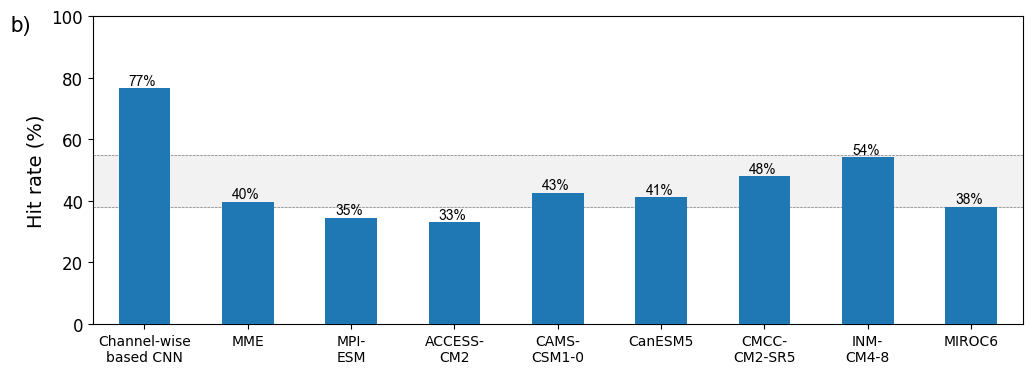

In [28]:
# plotted hit rate of all-season PDO type predictions (Figure 3b))
ax = hitrate.plot(kind="bar",figsize=(12, 4),legend=False,zorder =4)

plt.rcParams["font.family"] = "Arial"


plt.axhline(y=confidence_interval[0], c="gray", linestyle = 'dashed',linewidth=0.5)
plt.axhline(y=confidence_interval[1], c="gray", linestyle = 'dashed',linewidth=0.5)


x_offset = -0.15
y_offset = 1
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0) +'%'      
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset),size=10)
    
c = np.arange(-1, 12, 1)
a = (confidence_interval[0])
b = (confidence_interval[1])

ax.fill_between(c,a,b, color = 'gray', alpha = 0.1,zorder = 0)
plt.rcParams["font.family"] = "Arial"


plt.text(-1.3,95, "b)",fontsize=16)

plt.xticks(rotation=90, horizontalalignment="center")

plt.ylim(-0,100)

plt.ylabel('Hit rate (%)', fontsize=14)
plt.xticks([0,1,2,3,4,5,6,7,8],['Channel-wise\nbased CNN', 'MME','MPI-\nESM', 'ACCESS-\nCM2', 'CAMS-\nCSM1-0', 'CanESM5',
                                     'CMCC-\nCM2-SR5','INM-\nCM4-8','MIROC6']
           ,rotation=0, fontsize=10)
plt.yticks( fontsize=12)

plt.savefig(outdir+'PDO hit rate'+'.png',bbox_inches='tight')
plt.show()

# END